Cloning into 'Amthal'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 101 (delta 14), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (101/101), 2.84 MiB | 5.49 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/Amthal/Amthal/Amthal/Amthal/Amthal/Amthal/Amthal
Data loaded successfully. Found 4078 instances.



/tmp/ipython-input-2644318344.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


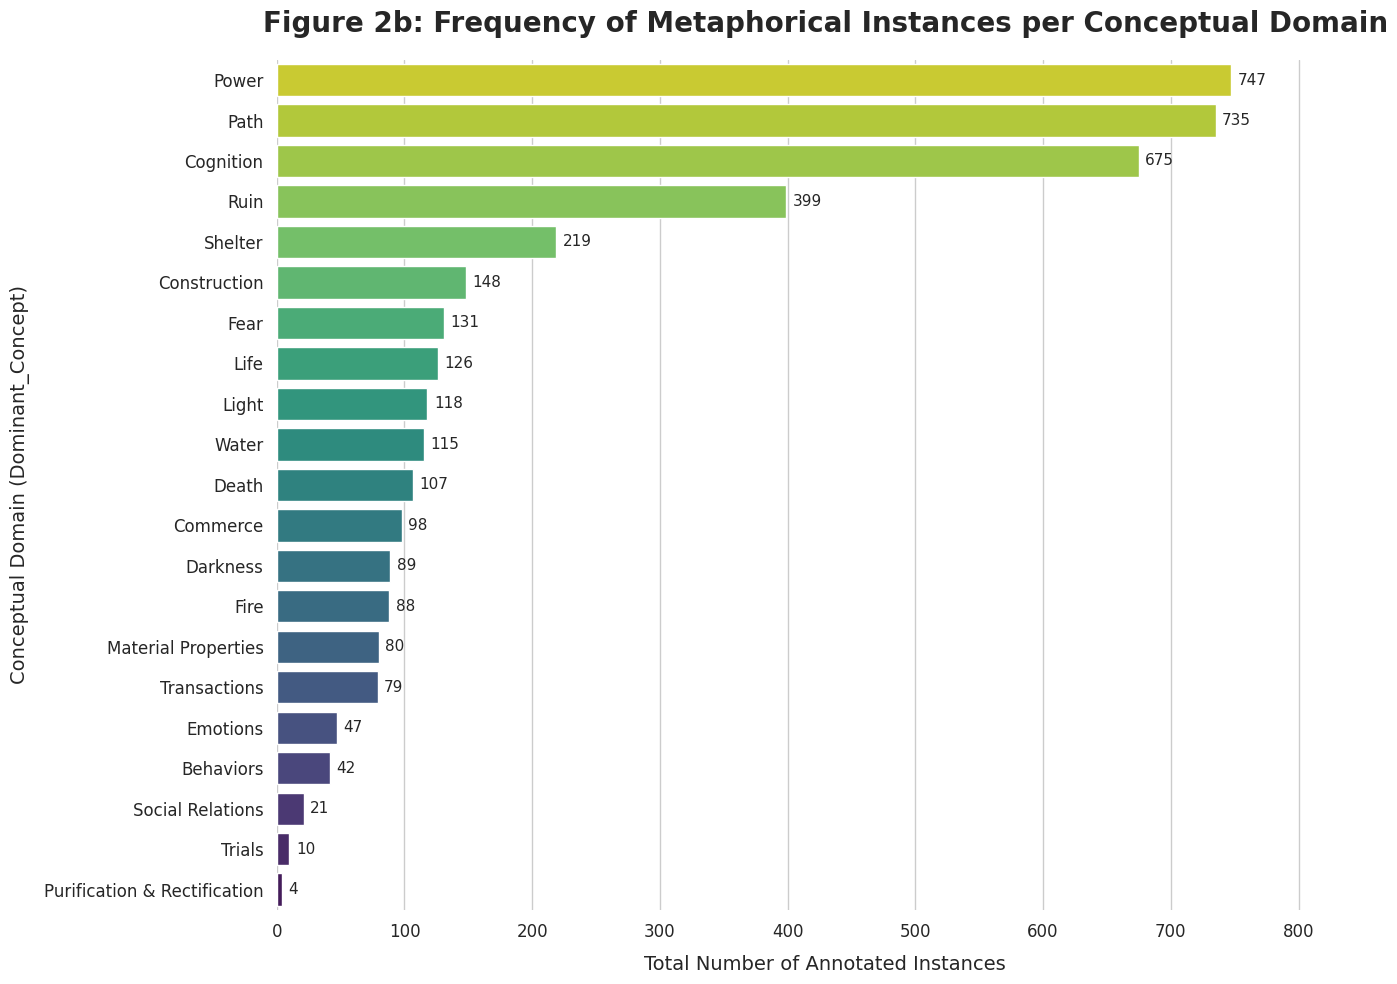

In [ ]:
#@title  **Frequency of Metaphorical Instances per Conceptual Domain**


# --- إعداد عام ---
!git clone https://github.com/NoorBayan/Amthal.git
%cd Amthal

from utility import *
from IPython.display import display, HTML, clear_output
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# تجاهل التحذيرات الخاصة بالخطوط
warnings.filterwarnings("ignore", message=".*font_manager.*")

# تعيين خط متوفر في كل بيئات matplotlib
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["font.serif"] = ["DejaVu Serif"]

# --- [الخطوة 1: تحميل وتجهيز البيانات] ---
INSTANCES_FILE_PATH = '/content/Amthal/data/processed/instances.csv'
try:
    df = pd.read_csv(INSTANCES_FILE_PATH, sep='\t', encoding='utf-16')
    df['Dominant_Concept']=[Dominant_Concept_dic[i]['en'] for i in df.Dominant_Concept]
    df['Valence']=[Valence_dic[i]['ar'] for i in df.Valence]
    df['Revelation_Phase']=[Revelation_Phase_dic[i]['ar'] for i in df.Revelation_Phase]
    df['Abstraction_Level']=[Abstraction_Level_dic[i]['ar'] for i in df.Abstraction_Level]
    print(f"Data loaded successfully. Found {len(df)} instances.\n")
except FileNotFoundError:
    print(f"⚠️ ERROR: File not found at '{INSTANCES_FILE_PATH}'. Please check the path and try again.")
    exit()





# --- 1. تحميل البيانات الحقيقية ---
# افترض أن 'df' هو الـ DataFrame الكامل الذي يحتوي على الكوربس
# df = pd.read_csv('your_full_instances_file.csv', sep='\t')

# --- 2. حساب تكرار المفاهيم (خطوتك الصحيحة) ---
concept_counts_df = df['Dominant_Concept'].value_counts().reset_index()

# --- 3. إعادة تسمية الأعمدة (الخطوة الإضافية والمهمة) ---
concept_counts_df.columns = ['Dominant_Concept', 'Instance_Count']

# --- الآن أصبح الـ DataFrame جاهزًا تمامًا للرسم ---
#print("--- الـ DataFrame بعد تصحيح أسماء الأعمدة ---")
#print(concept_counts_df)

# --- 4. إعداد الرسم البياني الاحترافي (نفس كود الرسم السابق) ---
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 10))

barplot = sns.barplot(
    data=concept_counts_df, # استخدام الـ DataFrame المصحح
    x='Instance_Count',
    y='Dominant_Concept',
    palette='viridis_r',
    ax=ax
)

# ... بقية كود الرسم والتنسيق يبقى كما هو بدون أي تغيير ...
ax.set_title('Figure 2b: Frequency of Metaphorical Instances per Conceptual Domain', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Total Number of Annotated Instances', fontsize=14, labelpad=10)
ax.set_ylabel('Conceptual Domain (Dominant_Concept)', fontsize=14, labelpad=10)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5,
            p.get_y() + p.get_height() / 2,
            f'{int(width)}',
            va='center',
            ha='left',
            fontsize=11)

max_count = concept_counts_df['Instance_Count'].max()
ax.set_xlim(0, max_count * 1.15)
sns.despine(left=True, bottom=True)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.savefig('Figure_2b_Concept_Frequency.png', dpi=300, bbox_inches='tight')
plt.show()